<center>
    <font size='4
    <strong> Data mining reveals spatial dynamics of global COVID-19 research </strong>
    </font>
</center>

<center>
<font size='4'><b>Modelling landslide susceptibility of Cox's Bazar district and Rohingya camps in southeastern Bangladesh through machine learning</b></font><br><br>

    
</center>

#### Data
* Cox's Bazar Landslide Inventory Map
* Landsat 8 Satellite image (NDVI, NDWI, Landuse)
* DEM (Elevation, Slope Aspect, Curvature)
* Soil Type
* Soil Texture
* Soil Permeability

#### Import packages and data

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Import data
df = pd.read_csv(os.path.join('..','data','Landslide_Data.csv'))

In [16]:
df.head(5)

,OBJECTID,Landslide,Aspect,Curvature,Elevation,Geology,LULC_2020,NDVI,Road_dist,Slope,SoilTexture,SoilType,SPI,Stream_dist
0,1,1,190.491470,-0.222222,36,7,2,0.263359,381.837677,19.304520,21,4,-0.370848,67.082039
1,2,1,205.709961,0.666667,43,7,2,0.286868,366.196655,19.526470,21,4,0.409195,67.082039
2,3,1,236.040939,0.333333,89,7,2,0.291367,540.832703,12.309163,3,1,-1.394833,240.000000
3,4,1,187.943466,0.444444,106,7,2,0.361999,600.000000,20.940453,3,1,-0.318317,283.019440
4,5,1,230.262390,0.111111,160,7,2,0.309558,816.088257,24.932274,3,1,-0.101314,284.604981


In [32]:
print(len(df['Geology'].unique()))

11


In [19]:
df.shape

(1262, 14)

#### Slice relevant columns

In [20]:
df = df[df.columns[1:]]
df

,Landslide,Aspect,Curvature,Elevation,Geology,LULC_2020,NDVI,Road_dist,Slope,SoilTexture,SoilType,SPI,Stream_dist
0,1,190.491470,-0.222222,36,7,2,0.263359,381.837677,19.304520,21,4,-0.370848,67.082039
1,1,205.709961,0.666667,43,7,2,0.286868,366.196655,19.526470,21,4,0.409195,67.082039
2,1,236.040939,0.333333,89,7,2,0.291367,540.832703,12.309163,3,1,-1.394833,240.000000
3,1,187.943466,0.444444,106,7,2,0.361999,600.000000,20.940453,3,1,-0.318317,283.019440
4,1,230.262390,0.111111,160,7,2,0.309558,816.088257,24.932274,3,1,-0.101314,284.604981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,0,0.000000,-0.111111,11,1,0,0.138290,782.304260,1.322716,3,1,-0.943135,60.000000
1258,0,-1.000000,-0.000000,5,1,0,0.107780,540.832703,0.925643,3,1,-2.145573,0.000000
1259,0,305.537689,-0.111111,5,9,4,0.191957,1142.365967,2.622850,3,1,-0.526580,60.000000
1260,0,135.000000,-0.000000,5,9,2,0.215087,2544.346680,0.383246,5,2,-11.883438,331.360840


In [21]:
df = df.drop(columns=['SoilTexture','SoilType'])

In [22]:
df.shape

(1262, 11)

#### Rearrange columns

In [23]:
categorical_variables = ['Geology', 'LULC_2020','Landslide']
non_categorical_variables = list(set(df.columns) - set(categorical_variables))

# Re-ordering columns to have non-categorical varaibles first
order = non_categorical_variables + categorical_variables
df = df[order]

In [24]:
df

,SPI,Aspect,Stream_dist,Elevation,Curvature,Slope,Road_dist,NDVI,Geology,LULC_2020,Landslide
0,-0.370848,190.491470,67.082039,36,-0.222222,19.304520,381.837677,0.263359,7,2,1
1,0.409195,205.709961,67.082039,43,0.666667,19.526470,366.196655,0.286868,7,2,1
2,-1.394833,236.040939,240.000000,89,0.333333,12.309163,540.832703,0.291367,7,2,1
3,-0.318317,187.943466,283.019440,106,0.444444,20.940453,600.000000,0.361999,7,2,1
4,-0.101314,230.262390,284.604981,160,0.111111,24.932274,816.088257,0.309558,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1257,-0.943135,0.000000,60.000000,11,-0.111111,1.322716,782.304260,0.138290,1,0,0
1258,-2.145573,-1.000000,0.000000,5,-0.000000,0.925643,540.832703,0.107780,1,0,0
1259,-0.526580,305.537689,60.000000,5,-0.111111,2.622850,1142.365967,0.191957,9,4,0
1260,-11.883438,135.000000,331.360840,5,-0.000000,0.383246,2544.346680,0.215087,9,2,0


In [25]:
df.columns

Index(['SPI', 'Aspect', 'Stream_dist', 'Elevation', 'Curvature', 'Slope',
       'Road_dist', 'NDVI', 'Geology', 'LULC_2020', 'Landslide'],
      dtype='object')

#### Calculate information gain (IG)

In [26]:
features = df.columns[:-1]

# Separating out the features
X = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['Landslide']].values

In [27]:
from sklearn.feature_selection import mutual_info_classif

res = dict(zip(features,
               mutual_info_classif(X, y.ravel(), discrete_features=[-1, -2, -3, -4])
               ))

In [28]:
res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}
res

{'NDVI': 0.6912359312554455,
 'Road_dist': 0.4813203963928374,
 'Slope': 0.21539145713957764,
 'Elevation': 0.20030275855140456,
 'Geology': 0.1775893308028033,
 'LULC_2020': 0.153172928869873,
 'SPI': 0.1507271023285528,
 'Aspect': 0.07968409650874819,
 'Curvature': 0.042681840899504,
 'Stream_dist': 0.03607577792143535}

#### One hot encode categorical variables

In [29]:
from sklearn.preprocessing import OneHotEncoder

# Add numerical feature names to final feature name list
final_feature_names = []
final_feature_names += non_categorical_variables

# List of categorical feature names
categorical_features = ['Geology', 'LULC_2020']

# Copy numerical features
data = df[non_categorical_variables]

# Copy one-hot encoded categorical features
for i in categorical_features:
    encoded = OneHotEncoder(sparse=False).fit_transform(df[i].values.reshape(df.shape[0],1))
    cols = [i+'_'+str(j) for j in range (1, encoded.shape[1]+1)]
    data = pd.concat([data, pd.DataFrame(encoded, columns=cols)], axis = 1)

# Copy labels
data = pd.concat([data, df[['Landslide']]], axis = 1)


In [30]:
data

,SPI,Aspect,Stream_dist,Elevation,Curvature,Slope,Road_dist,NDVI,Geology_1,Geology_2,...,Geology_7,Geology_8,Geology_9,Geology_10,Geology_11,LULC_2020_1,LULC_2020_2,LULC_2020_3,LULC_2020_4,Landslide
0,-0.370848,190.491470,67.082039,36,-0.222222,19.304520,381.837677,0.263359,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,0.409195,205.709961,67.082039,43,0.666667,19.526470,366.196655,0.286868,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,-1.394833,236.040939,240.000000,89,0.333333,12.309163,540.832703,0.291367,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,-0.318317,187.943466,283.019440,106,0.444444,20.940453,600.000000,0.361999,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,-0.101314,230.262390,284.604981,160,0.111111,24.932274,816.088257,0.309558,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,-0.943135,0.000000,60.000000,11,-0.111111,1.322716,782.304260,0.138290,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1258,-2.145573,-1.000000,0.000000,5,-0.000000,0.925643,540.832703,0.107780,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1259,-0.526580,305.537689,60.000000,5,-0.111111,2.622850,1142.365967,0.191957,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1260,-11.883438,135.000000,331.360840,5,-0.000000,0.383246,2544.346680,0.215087,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [16]:
data.columns

Index(['Curvature', 'SPI', 'Aspect', 'Elevation', 'Road_dist', 'NDVI',
       'Stream_dist', 'Slope', 'Geology_1', 'Geology_2', 'Geology_3',
       'Geology_4', 'Geology_5', 'Geology_6', 'Geology_7', 'Geology_8',
       'Geology_9', 'Geology_10', 'Geology_11', 'LULC_2020_1', 'LULC_2020_2',
       'LULC_2020_3', 'LULC_2020_4', 'Landslide'],
      dtype='object')

#### Feature scaling

In [17]:
from sklearn.preprocessing import StandardScaler

# Stan
features = data.columns[:-1]

# Separating out the features
X = data.loc[:, features].values

# Separating out the target
y = data.loc[:,['Landslide']].values

X = StandardScaler().fit_transform(X)

In [18]:
X.shape

(1262, 23)

#### Principal Component Analysis

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [20]:
finalDf = pd.concat([principalDf, data[['Landslide']]], axis = 1)

In [21]:
finalDf

,principal component 1,principal component 2,Landslide
0,3.788854,0.610600,1
1,3.930947,0.594835,1
2,4.308257,0.676679,1
3,5.594572,1.173058,1
4,6.833087,2.365203,1
...,...,...,...
1257,-1.507562,1.276212,0
1258,-1.821227,1.289678,0
1259,-0.685971,-1.976964,0
1260,-0.214750,-2.468360,0


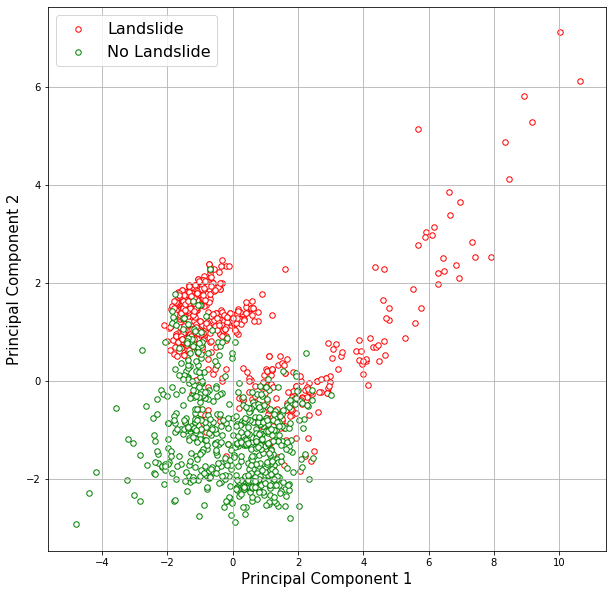

In [63]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Landslide'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = 'white',
#                c = color,
               edgecolors = color,
               s = 30,
#                alpha = 0.25
              )
ax.legend(['Landslide','No Landslide'], fontsize =16)
ax.grid()
plt.savefig(os.path.join('..','figures','pca.png'), dpi = 300)

#### Splitting dataset for training and testing

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

#### Machine Learning Algorithms

In [24]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve

##### k-Nearest Neighbor
Hyperparameter(s):
* n_neighbors
* weights
* metric

Hyperparameter optimization

In [25]:
model = KNeighborsClassifier()

param_grid = { 
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan'],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

metric = grid.best_estimator_.metric
n_neighbors = grid.best_estimator_.n_neighbors
weights = grid.best_estimator_.weights

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.8863802718717324
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


Train on optimal hyperparameters

In [26]:
knn = KNeighborsClassifier(metric=metric, n_neighbors=n_neighbors, weights=weights).fit(X_train, y_train.ravel())

Get predictions and probabilities on test set

In [27]:
knn_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)

Performance metrics

In [64]:
knn_conf_mat = confusion_matrix(y_test, knn_pred)
knn_acc = accuracy_score(y_test, knn_pred)
knn_roc_auc = roc_auc_score(y_test, knn_proba[:,1])

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_proba[:,1])
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_proba[:,1])

knn_cls_precision, knn_cls_recall, knn_cls_f1, _ = precision_recall_fscore_support(y_test, knn_pred, average=None, labels=[0,1])



print('k Nearest Neighbors:')
print('\nConfusion matrix:\n',knn_conf_mat,'\n')
tn, fp, fn, tp = knn_conf_mat.ravel()
print('TN: ', tn,' FP: ', fp,' FN: ', fn,' TP: ', tp)
print('Accuracy:',knn_acc)
print('ROC AUC=%.4f' % (knn_roc_auc))
print('Precision on (Landslide = 0) = %.4f ' % (knn_cls_precision[0]))
print('Recall on (Landslide = 0) = %.4f ' % (knn_cls_recall[0]))
print('F1 on (Landslide = 0) = %.4f' % (knn_cls_f1[0]))
print('Precision on (Landslide = 1) = %.4f ' % (knn_cls_precision[1]))
print('Recall on (Landslide = 1) = %.4f ' % (knn_cls_recall[1]))
print('F1 on (Landslide = 1) = %.4f ' % (knn_cls_f1[1]))

k Nearest Neighbors:

Confusion matrix:
 [[215  29]
 [ 18 243]] 

TN:  215  FP:  29  FN:  18  TP:  243
Accuracy: 0.906930693069307
ROC AUC=0.9721
Precision on (Landslide = 0) = 0.9227 
Recall on (Landslide = 0) = 0.8811 
F1 on (Landslide = 0) = 0.9015
Precision on (Landslide = 1) = 0.8934 
Recall on (Landslide = 1) = 0.9310 
F1 on (Landslide = 1) = 0.9118 


##### Logistic Regression
Hyperparameter(s): 
* C (inverse of regularization strength)

In [29]:
np.logspace(-3,3,7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

Hyperparameter optimization

In [30]:
model = LogisticRegression(random_state=0, solver = 'liblinear')

param_grid={'C':np.logspace(-3,3,7), # inverse of regularization strength
     }

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

C = grid.best_estimator_.C

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9167741373300802
Best hyperparameters: {'C': 10.0}


Train on opmtimal hyperparameters

In [31]:
lr = LogisticRegression(random_state =0, solver = 'liblinear', C=C).fit(X_train,y_train.ravel())

Get predictions and probabilities on test set

In [32]:
lr_pred = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)

Performance metrics

In [65]:
lr_conf_mat = confusion_matrix(y_test, lr_pred)
lr_acc = accuracy_score(y_test, lr_pred)
lr_roc_auc = roc_auc_score(y_test, lr_proba[:,1])

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:,1])
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_proba[:,1])

lr_cls_precision, lr_cls_recall, lr_cls_f1, _ = precision_recall_fscore_support(y_test, lr_pred, average=None, labels=[0,1])
print('Logistic Regression:')
print('\nConfusion matrix:\n',lr_conf_mat,'\n')
tn, fp, fn, tp = lr_conf_mat.ravel()
print('TN: ', tn,' FP: ', fp,' FN: ', fn,' TP: ', tp)
print('Accuracy:',lr_acc)
print('ROC AUC=%.4f' % (lr_roc_auc))
print('Precision on (Landslide = 0) = %.4f ' % (lr_cls_precision[0]))
print('Recall on (Landslide = 0) = %.4f ' % (lr_cls_recall[0]))
print('F1 on (Landslide = 0) = %.4f' % (lr_cls_f1[0]))
print('Precision on (Landslide = 1) = %.4f ' % (lr_cls_precision[1]))
print('Recall on (Landslide = 1) = %.4f ' % (lr_cls_recall[1]))
print('F1 on (Landslide = 1) = %.4f ' % (lr_cls_f1[1]))


Logistic Regression:

Confusion matrix:
 [[226  18]
 [ 19 242]] 

TN:  226  FP:  18  FN:  19  TP:  242
Accuracy: 0.9267326732673268
ROC AUC=0.9678
Precision on (Landslide = 0) = 0.9224 
Recall on (Landslide = 0) = 0.9262 
F1 on (Landslide = 0) = 0.9243
Precision on (Landslide = 1) = 0.9308 
Recall on (Landslide = 1) = 0.9272 
F1 on (Landslide = 1) = 0.9290 


##### Support Vector Machine
Hyperparameter(s): 
* C (inverse of regularization strength)
* kernel (Specifies kernel type from, ‘poly’, ‘rbf’, ‘sigmoid’)
* Gamma (kernel coefficient for 'rbf', 'poly' and 'sigmoid'

Hyperparameter optimization

In [34]:
model = SVC(random_state=0, probability=True)

param_grid={'C':np.logspace(-3,3,7),
            'kernel': ['poly', 'rbf', 'sigmoid'],
          'gamma': [0.001, 0.01, 1],
           }
grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

C = grid.best_estimator_.C
gamma = grid.best_estimator_.gamma
kernel = grid.best_estimator_.kernel

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9286772394562565
Best hyperparameters: {'C': 1000.0, 'gamma': 0.001, 'kernel': 'rbf'}


Train on opmtimal hyperparameters

In [35]:
svm = SVC(random_state =0, probability = True, C=C,  gamma =gamma, kernel = kernel).fit(X_train,y_train.ravel())

Get predictions and probabilities on test set

In [36]:
svm_pred = svm.predict(X_test)
svm_proba = svm.predict_proba(X_test)

Performance metrics

In [66]:
svm_conf_mat = confusion_matrix(y_test, svm_pred)
svm_acc = accuracy_score(y_test, svm_pred)
svm_roc_auc = roc_auc_score(y_test, svm_proba[:,1])

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_proba[:,1])
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_proba[:,1])

svm_cls_precision, svm_cls_recall, svm_cls_f1, _ = precision_recall_fscore_support(y_test, svm_pred, average=None, labels=[0,1])
print('Support Vector Machine :')
print('\nConfusion matrix:\n',svm_conf_mat,'\n')
tn, fp, fn, tp = svm_conf_mat.ravel()
print('TN: ', tn,' FP: ', fp,' FN: ', fn,' TP: ', tp)
print('Accuracy:',svm_acc)
print('ROC AUC=%.4f' % (svm_roc_auc))
print('Precision on (Landslide = 0) = %.4f ' % (svm_cls_precision[0]))
print('Recall on (Landslide = 0) = %.4f ' % (svm_cls_recall[0]))
print('F1 on (Landslide = 0) = %.4f' % (svm_cls_f1[0]))
print('Precision on (Landslide = 1) = %.4f ' % (svm_cls_precision[1]))
print('Recall on (Landslide = 1) = %.4f ' % (svm_cls_recall[1]))
print('F1 on (Landslide = 1) = %.4f ' % (svm_cls_f1[1]))

Support Vector Machine :

Confusion matrix:
 [[229  15]
 [ 15 246]] 

TN:  229  FP:  15  FN:  15  TP:  246
Accuracy: 0.9405940594059405
ROC AUC=0.9809
Precision on (Landslide = 0) = 0.9385 
Recall on (Landslide = 0) = 0.9385 
F1 on (Landslide = 0) = 0.9385
Precision on (Landslide = 1) = 0.9425 
Recall on (Landslide = 1) = 0.9425 
F1 on (Landslide = 1) = 0.9425 


##### Multi Layer Perceptron (Artificial Neural Network
Hyperparameter(s):
* hidden_layer_sizes
* activation (activation function for squeezing output)
* alpha
* learning rate

Hyperparameter optimization

In [38]:
10.0 ** -np.arange(1, 5)

array([0.1   , 0.01  , 0.001 , 0.0001])

In [39]:
np.arange(10, 50, 5)

array([10, 15, 20, 25, 30, 35, 40, 45])

In [40]:
model = MLPClassifier(random_state=0, max_iter=1000)

param_grid={
            'hidden_layer_sizes': np.arange(10, 50,5),
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'alpha' : 10.0 ** -np.arange(1, 5),
            'learning_rate': ['constant', 'adaptive']
           }

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

hidden_layer_sizes = grid.best_estimator_.hidden_layer_sizes
activation = grid.best_estimator_.activation
alpha = grid.best_estimator_.alpha
learning_rate = grid.best_estimator_.learning_rate

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

/home/nahian/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/nahian/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/nahian/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/nahian/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't co

Best score: 0.9445364238410596
Best hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 20, 'learning_rate': 'constant'}


Train on optimal hyperparameters

In [41]:
mlp = MLPClassifier(random_state=0, max_iter = 2000, activation = activation, alpha = alpha, hidden_layer_sizes = hidden_layer_sizes, learning_rate=learning_rate).fit(X_train, y_train.ravel())

Get predictions and probabilities on test set

In [42]:
mlp_pred = mlp.predict(X_test)
mlp_proba = mlp.predict_proba(X_test)

Performance metrics

In [67]:
mlp_conf_mat = confusion_matrix(y_test, mlp_pred)
mlp_acc = accuracy_score(y_test, mlp_pred)
mlp_roc_auc = roc_auc_score(y_test, mlp_proba[:,1])

mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_proba[:,1])
mlp_precision, mlp_recall, _ = precision_recall_curve(y_test, mlp_proba[:,1])

mlp_cls_precision, mlp_cls_recall, mlp_cls_f1, _ = precision_recall_fscore_support(y_test, mlp_pred, average=None, labels=[0,1])

print('Multi Layer Perceptron :')
print('\nConfusion matrix:\n',mlp_conf_mat,'\n')
tn, fp, fn, tp = mlp_conf_mat.ravel()
print('TN: ', tn,' FP: ', fp,' FN: ', fn,' TP: ', tp)
print('Accuracy:',mlp_acc)
print('ROC AUC=%.4f' % (mlp_roc_auc))
print('Precision on (Landslide = 0) = %.4f ' % (mlp_cls_precision[0]))
print('Recall on (Landslide = 0) = %.4f ' % (mlp_cls_recall[0]))
print('F1 on (Landslide = 0) = %.4f' % (mlp_cls_f1[0]))
print('Precision on (Landslide = 1) = %.4f ' % (mlp_cls_precision[1]))
print('Recall on (Landslide = 1) = %.4f ' % (mlp_cls_recall[1]))
print('F1 on (Landslide = 1) = %.4f ' % (mlp_cls_f1[1]))

Multi Layer Perceptron :

Confusion matrix:
 [[232  12]
 [ 11 250]] 

TN:  232  FP:  12  FN:  11  TP:  250
Accuracy: 0.9544554455445544
ROC AUC=0.9862
Precision on (Landslide = 0) = 0.9547 
Recall on (Landslide = 0) = 0.9508 
F1 on (Landslide = 0) = 0.9528
Precision on (Landslide = 1) = 0.9542 
Recall on (Landslide = 1) = 0.9579 
F1 on (Landslide = 1) = 0.9560 


##### Decision Tree
* max_features
* max_depth
* criterion

Hyperparameter optimization

In [44]:
np.arange(10,30,2)

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

In [45]:
model = DecisionTreeClassifier(random_state=0)

param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(10,40,5),
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

criterion = grid.best_estimator_.criterion
max_depth = grid.best_estimator_.max_depth
max_features = grid.best_estimator_.max_features

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.896897873823632
Best hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto'}


Train on optimal hyperparameters

In [46]:
dt = DecisionTreeClassifier(random_state=0, criterion = criterion, max_depth=max_depth, max_features=max_features).fit(X_train, y_train.ravel())

Get predictions and probabilities on test set

In [47]:
dt_pred = dt.predict(X_test)
dt_proba = dt.predict_proba(X_test)

Performance metrics

In [48]:
dt_conf_mat = confusion_matrix(y_test, dt_pred)
dt_acc = accuracy_score(y_test, dt_pred)
dt_roc_auc = roc_auc_score(y_test, dt_proba[:,1])

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_proba[:,1])
dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_proba[:,1])

dt_cls_precision, dt_cls_recall, dt_cls_f1, _ = precision_recall_fscore_support(y_test, dt_pred, average=None, labels=[0,1])

print('Decision Tree:')
print('\nConfusion matrix:\n',dt_conf_mat,'\n')
tn, fp, fn, tp = dt_conf_mat.ravel()
print('TN: ', tn,' FP: ', fp,' FN: ', fn,' TP: ', tp)
print('Accuracy:',dt_acc)
print('ROC AUC=%.4f' % (dt_roc_auc))
print('Precision on (Landslide = 0) = %.4f ' % (dt_cls_precision[0]))
print('Recall on (Landslide = 0) = %.4f ' % (dt_cls_recall[0]))
print('F1 on (Landslide = 0) = %.4f' % (dt_cls_f1[0]))
print('Precision on (Landslide = 1) = %.4f ' % (dt_cls_precision[1]))
print('Recall on (Landslide = 1) = %.4f ' % (dt_cls_recall[1]))
print('F1 on (Landslide = 1) = %.4f ' % (dt_cls_f1[1]))

Decision Tree:

Confusion matrix:
 [[211  33]
 [ 38 223]] 

Accuracy: 0.8594059405940594
ROC AUC=0.8533
Precision on (Landslide = 0) = 0.8474 
Recall on (Landslide = 0) = 0.8648 
F1 on (Landslide = 0) = 0.8560
Precision on (Landslide = 1) = 0.8711 
Recall on (Landslide = 1) = 0.8544 
F1 on (Landslide = 1) = 0.8627 


##### Random Forest

Hyperparameter(s):
* n_estimators
* max_features
* max_depth
* criterion

Hyperparameter optimization

In [49]:
model = RandomForestClassifier(random_state=0)

param_grid = { 
    'n_estimators': [200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(10,30,2),
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

n_estimators = grid.best_estimator_.n_estimators
criterion = grid.best_estimator_.criterion
max_depth = grid.best_estimator_.max_depth
max_features = grid.best_estimator_.max_features

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9497995817357964
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 500}


Train on optimal hyperparameters

In [50]:
rf = RandomForestClassifier(random_state=0, criterion=criterion, max_depth=max_depth, max_features=max_features, n_estimators = n_estimators).fit(X_train, y_train.ravel())

Get predictions and probabilities on test set

In [51]:
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)

Performance metrics

In [68]:
rf_conf_mat = confusion_matrix(y_test, rf_pred)
rf_acc = accuracy_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_proba[:,1])

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:,1])
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_proba[:,1])

rf_cls_precision, rf_cls_recall, rf_cls_f1, _ = precision_recall_fscore_support(y_test, rf_pred, average=None, labels=[0,1])

print('Random Forest :')
print('\nConfusion matrix:\n',rf_conf_mat,'\n')
tn, fp, fn, tp = rf_conf_mat.ravel()
print('TN: ', tn,' FP: ', fp,' FN: ', fn,' TP: ', tp)
print('Accuracy:',rf_acc)
print('ROC AUC=%.4f' % (rf_roc_auc))
print('Precision on (Landslide = 0) = %.4f ' % (rf_cls_precision[0]))
print('Recall on (Landslide = 0) = %.4f ' % (rf_cls_recall[0]))
print('F1 on (Landslide = 0) = %.4f' % (rf_cls_f1[0]))
print('Precision on (Landslide = 1) = %.4f ' % (rf_cls_precision[1]))
print('Recall on (Landslide = 1) = %.4f ' % (rf_cls_recall[1]))
print('F1 on (Landslide = 1) = %.4f ' % (rf_cls_f1[1]))

Random Forest :

Confusion matrix:
 [[236   8]
 [  9 252]] 

TN:  236  FP:  8  FN:  9  TP:  252
Accuracy: 0.9663366336633663
ROC AUC=0.9910
Precision on (Landslide = 0) = 0.9633 
Recall on (Landslide = 0) = 0.9672 
F1 on (Landslide = 0) = 0.9652
Precision on (Landslide = 1) = 0.9692 
Recall on (Landslide = 1) = 0.9655 
F1 on (Landslide = 1) = 0.9674 


#### Export trained and tested models

In [53]:
import joblib

joblib.dump(knn, os.path.join('..','models','knn.pkl'), compress=9)
joblib.dump(lr, os.path.join('..','models','lr.pkl'), compress=9)
joblib.dump(svm, os.path.join('..','models','svm.pkl'), compress=9)
joblib.dump(mlp, os.path.join('..','models','mlp.pkl'), compress=9)
joblib.dump(dt, os.path.join('..','models','dt.pkl'), compress=9)
joblib.dump(rf, os.path.join('..','models','rf.pkl'), compress=9)

['../models/rf.pkl']

#### Export performance metrics of models

In [54]:
perf_metr = pd.DataFrame(index = ['K Nearest Neighbors',
                        'Logistic Regression',
                        'Support Vector Machine',
                        'Multi Layer Perceptron',
                        'Decision Tree',
                        'Random Forest',
                       ],
             columns = ['Accuracy', 
                        'ROC AUC', 
                        'Precision on Landlside=0', 
                        'Recall on Landlside=0', 
                        'F1-score on Landlside=0', 
                        'Precision on Landlside=1', 
                        'Recall on Landlside=1', 
                        'F1-score on Landlside=1']
            )

In [55]:
knn_perf_metr = pd.Series([knn_acc, knn_roc_auc, knn_cls_precision[0], knn_cls_recall[0], knn_cls_f1[0], knn_cls_precision[0],knn_cls_recall[0], knn_cls_f1[0]])
lr_perf_metr = pd.Series([lr_acc, lr_roc_auc, lr_cls_precision[0], lr_cls_recall[0], lr_cls_f1[0], lr_cls_precision[0],lr_cls_recall[0], lr_cls_f1[0]])
svm_perf_metr = pd.Series([svm_acc, svm_roc_auc, svm_cls_precision[0], svm_cls_recall[0], svm_cls_f1[0], svm_cls_precision[0],svm_cls_recall[0], svm_cls_f1[0]])
mlp_perf_metr = pd.Series([mlp_acc, mlp_roc_auc, mlp_cls_precision[0], mlp_cls_recall[0], mlp_cls_f1[0], mlp_cls_precision[0],mlp_cls_recall[0], mlp_cls_f1[0]])
dt_perf_metr = pd.Series([dt_acc, dt_roc_auc, dt_cls_precision[0], dt_cls_recall[0], dt_cls_f1[0], dt_cls_precision[0],dt_cls_recall[0], dt_cls_f1[0]])
rf_perf_metr = pd.Series([rf_acc, rf_roc_auc, rf_cls_precision[0], rf_cls_recall[0], rf_cls_f1[0], rf_cls_precision[0],rf_cls_recall[0], rf_cls_f1[0]])

In [56]:
perf_metr.loc['K Nearest Neighbors',:] = knn_perf_metr.values
perf_metr.loc['Logistic Regression',:] = lr_perf_metr.values
perf_metr.loc[ 'Support Vector Machine',:] = svm_perf_metr.values
perf_metr.loc['Multi Layer Perceptron',:] = mlp_perf_metr.values
perf_metr.loc['Decision Tree',:] = dt_perf_metr.values
perf_metr.loc['Random Forest',:] = rf_perf_metr.values

In [57]:
perf_metr = perf_metr.astype(float).round(4)

In [58]:
perf_metr

,Accuracy,ROC AUC,Precision on Landlside=0,Recall on Landlside=0,F1-score on Landlside=0,Precision on Landlside=1,Recall on Landlside=1,F1-score on Landlside=1
K Nearest Neighbors,0.9069,0.9721,0.9227,0.8811,0.9015,0.9227,0.8811,0.9015
Logistic Regression,0.9267,0.9678,0.9224,0.9262,0.9243,0.9224,0.9262,0.9243
Support Vector Machine,0.9406,0.9809,0.9385,0.9385,0.9385,0.9385,0.9385,0.9385
Multi Layer Perceptron,0.9545,0.9862,0.9547,0.9508,0.9528,0.9547,0.9508,0.9528
Decision Tree,0.8594,0.8533,0.8474,0.8648,0.8560,0.8474,0.8648,0.8560
Random Forest,0.9663,0.9910,0.9633,0.9672,0.9652,0.9633,0.9672,0.9652


In [59]:
perf_metr.to_csv(os.path.join('..','data','performance_metrics.csv'))

#### ROC-AUC curves

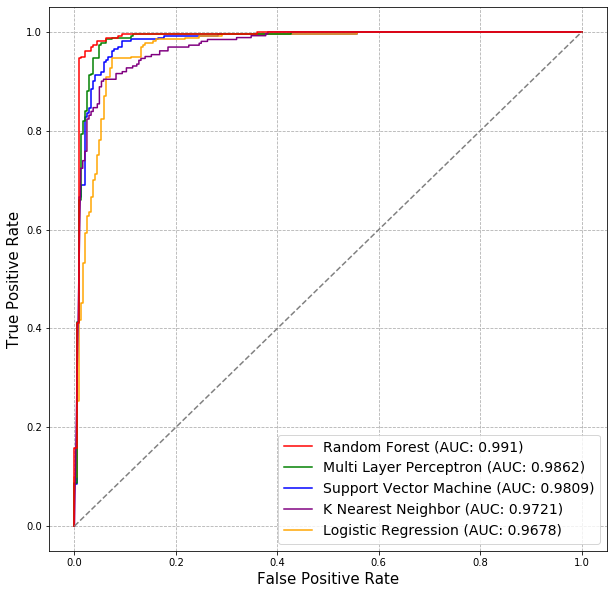

In [74]:
# calculate roc curves

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:,1])
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_proba[:,1])
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_proba[:,1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:,1])

fig, ax = plt.subplots(1, figsize=(10,10))

# fig.figure(figsize=(10,10))

# plot the roc curve for the models
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax.plot(svm_fpr, svm_tpr,  color = 'blue', label='Support Vector Machine (AUC: ' + str(np.round(svm_roc_auc,4))+')')
ax.plot(lr_fpr, lr_tpr,  color = 'orange', label='Logistic Regression (AUC: ' + str(np.round(lr_roc_auc,4))+')')
ax.plot(mlp_fpr, mlp_tpr, color = 'green', label='Multi Layer Perceptron (AUC: ' + str(np.round(mlp_roc_auc,4))+')')
ax.plot(knn_fpr, knn_tpr,  color = 'purple',label='K Nearest Neighbor (AUC: ' + str(np.round(knn_roc_auc,4))+')')
# ax.plot(dt_fpr, dt_tpr,  color = 'yellow', label='Decision Tree (AUC: ' + str(np.round(dt_roc_auc,4))+')')
ax.plot(rf_fpr, rf_tpr,  color = 'red', label='Random Forest (AUC: ' + str(np.round(rf_roc_auc,4))+')')
ax.plot([0,1],[0,1], color='grey', linestyle='dashed')

# axis labels
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.set_ylabel('True Positive Rate', fontsize=15)

# show the legend
# plt.legend()

handles,labels = ax.get_legend_handles_labels()


handles = [handles[4], handles[2], handles[0], handles[3], handles[1]]
labels = [labels[4], labels[2], labels[0], labels[3], labels[1]]

ax.grid(linestyle='dashed')
ax.legend(handles,labels, fontsize=14)

plt.savefig(os.path.join('..','figures','roc-auc.png'), dpi = 500)
# show the plot
plt.show()


#### Decision Tree for visualization
(Graphviz needs to be installed for visualizing decision trees)

In [61]:
# Stan
features = data.columns[:-1]

# Separating out the features
X = data.loc[:, features].values

# Separating out the target
y = data.loc[:,['Landslide']].values


In [62]:
X

array([[1.93045197e+01, 6.70820389e+01, 3.81837677e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.95264702e+01, 6.70820389e+01, 3.66196655e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.23091631e+01, 2.40000000e+02, 5.40832703e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.62284990e+00, 6.00000000e+01, 1.14236597e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.83245700e-01, 3.31360840e+02, 2.54434668e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.30344820e+00, 2.10000000e+02, 1.17652026e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [63]:
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

Hyperparameter optimization

In [65]:
np.arange(10,30,2)

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

In [66]:
model = DecisionTreeClassifier(random_state=0)

param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : np.arange(1,50),
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

criterion = grid.best_estimator_.criterion
max_depth = grid.best_estimator_.max_depth
max_features = grid.best_estimator_.max_features

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9008191007319624
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 13, 'max_features': 'auto'}


Train on optimal hyperparameters

In [67]:
dt_viz = DecisionTreeClassifier(random_state=0, criterion = criterion, max_depth=max_depth, max_features=max_features).fit(X_train, y_train.ravel())

Get predictions and probabilities on test set

In [68]:
dt_viz_pred = dt_viz.predict(X_test)
dt_viz_proba = dt_viz.predict_proba(X_test)

Performance metrics

In [69]:
dt_viz_conf_mat = confusion_matrix(y_test, dt_viz_pred)
dt_viz_acc = accuracy_score(y_test, dt_viz_pred)
dt_viz_roc_auc = roc_auc_score(y_test, dt_viz_proba[:,1])

dt_viz_fpr, dt_viz_tpr, _ = roc_curve(y_test, dt_viz_proba[:,1])
dt_viz_precision, dt_viz_recall, _ = precision_recall_curve(y_test, dt_viz_proba[:,1])

dt_viz_cls_precision, dt_viz_cls_recall, dt_viz_cls_f1, _ = precision_recall_fscore_support(y_test, dt_viz_pred, average=None, labels=[0,1])

print('Decision Tree for Visualization:')
print('\nConfusion matrix:\n',dt_viz_conf_mat,'\n')
print('Accuracy:',dt_viz_acc)
print('ROC AUC=%.4f' % (dt_viz_roc_auc))
print('Precision on (Landslide = 0) = %.4f ' % (dt_viz_cls_precision[0]))
print('Recall on (Landslide = 0) = %.4f ' % (dt_viz_cls_recall[0]))
print('F1 on (Landslide = 0) = %.4f' % (dt_viz_cls_f1[0]))
print('Precision on (Landslide = 1) = %.4f ' % (dt_viz_cls_precision[1]))
print('Recall on (Landslide = 1) = %.4f ' % (dt_viz_cls_recall[1]))
print('F1 on (Landslide = 1) = %.4f ' % (dt_viz_cls_f1[1]))

Decision Tree for Visualization:

Confusion matrix:
 [[225  19]
 [ 25 236]] 

Accuracy: 0.9128712871287129
ROC AUC=0.9131
Precision on (Landslide = 0) = 0.9000 
Recall on (Landslide = 0) = 0.9221 
F1 on (Landslide = 0) = 0.9109
Precision on (Landslide = 1) = 0.9255 
Recall on (Landslide = 1) = 0.9042 
F1 on (Landslide = 1) = 0.9147 


In [70]:
from sklearn.tree import export_graphviz
# from graphviz import Source
# import pydot

In [71]:

export_graphviz(dt_viz, out_file=os.path.join('..','models','tree_viz.dot'), 
                feature_names = features,
#                 class_names = ['Landslide',]iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)



In [72]:
# Convert to png using system command (requires Graphviz) if graphviz not install use tree.dot file to generate png from convertio.co
from subprocess import call
call(['dot', '-Tpng', '../models/tree_viz.dot', '-o', '../figures/tree_viz.png', '-Gdpi=300'])

FileNotFoundError: [Errno 2] No such file or directory: 'dot': 'dot'